In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.data import load_wifi_dataset
import os
from PIL import Image
import json

In [2]:
notebook_path = os.getcwd()
project_path = notebook_path[:notebook_path.rfind("/")]
data_path = project_path + "/wifi_db"
result_path = project_path + "/outputs"
clean_result_path = result_path + "/clean" 
noisy_result_path = result_path + "/noisy"

# 1. Result analysis 

In [3]:
with open(clean_result_path+"/metrics_before.json", 'r') as file:
    clean_metrics = json.load(file)

with open(noisy_result_path+"/metrics_before.json", 'r') as file:
    noisy_metrics = json.load(file)

with open(clean_result_path+"/depth_before_after.json", 'r') as file:
    clean_depth_leaf = json.load(file)

with open(noisy_result_path+"/depth_before_after.json", 'r') as file:
    noisy_depth_leaf = json.load(file)

## 1.1. Clean vs Noisy Metrics Comparison

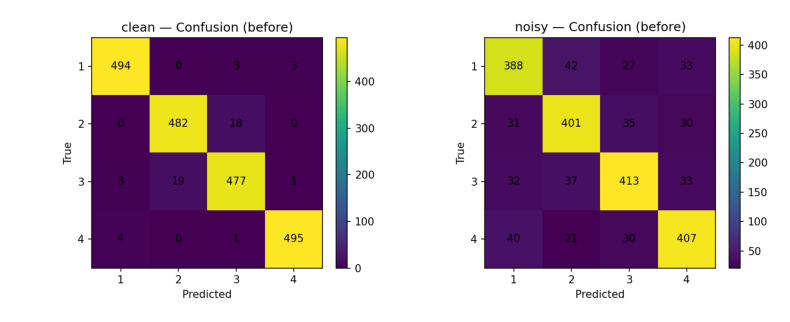

In [ ]:
clean_cm_img = np.asarray(Image.open(clean_result_path+"/cm_before.png"))
noisy_cm_img = np.asarray(Image.open(noisy_result_path+"/cm_before.png"))

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(clean_cm_img)
ax[0].axis(False)

ax[1].imshow(noisy_cm_img)
ax[1].axis(False)

fig.tight_layout()

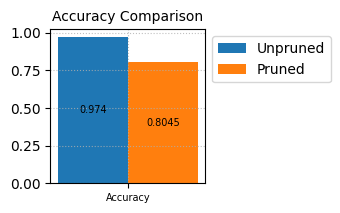

Accuracy Comparison
---------------------------------------------------------------------------
Clean		: 0.974
Noisy		: 0.804
Clean - Noisy	: 0.169
Clean dataset Accuracy is 21.069% higher than the noisy dataset
---------------------------------------------------------------------------


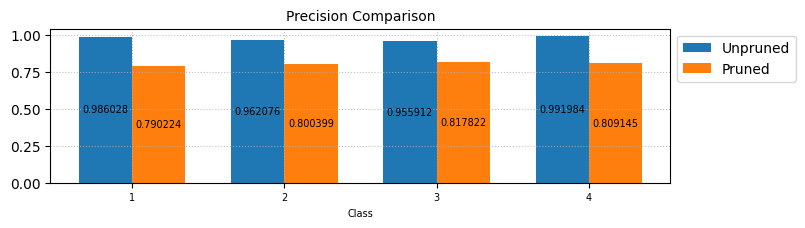

Precision Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.986
Noisy		: 0.790
Clean - Noisy	: 0.196
Clean dataset Precision is 24.778% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.962
Noisy		: 0.800
Clean - Noisy	: 0.162
Clean dataset Precision is 20.200% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.956
Noisy		: 0.818
Clean - Noisy	: 0.138
Clean dataset Precision is 16.885% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.992
Noisy		: 0.809
Clean - Noisy	: 0.183
Clean dataset Precision is 22.597% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean dataset Precision is 21.084% hi

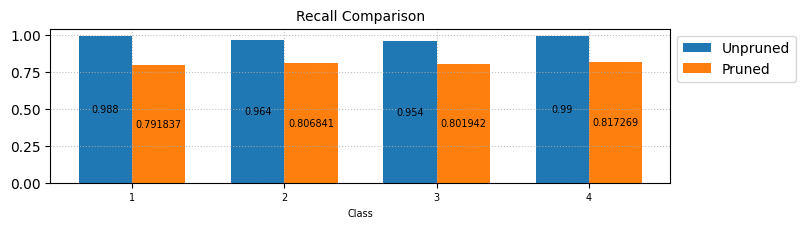

Recall Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.988
Noisy		: 0.792
Clean - Noisy	: 0.196
Clean dataset Recall is 24.773% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.964
Noisy		: 0.807
Clean - Noisy	: 0.157
Clean dataset Recall is 19.478% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.954
Noisy		: 0.802
Clean - Noisy	: 0.152
Clean dataset Recall is 18.961% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.990
Noisy		: 0.817
Clean - Noisy	: 0.173
Clean dataset Recall is 21.135% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean dataset Recall is 21.073% higher than the nois

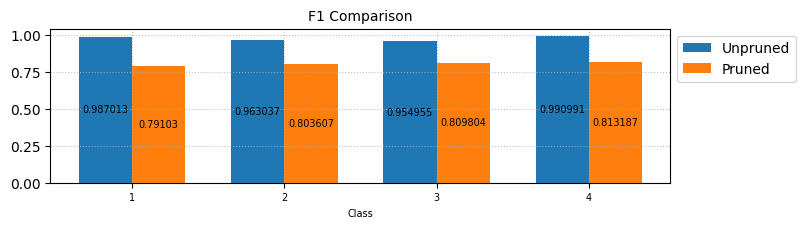

F1 Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.987
Noisy		: 0.791
Clean - Noisy	: 0.196
Clean dataset F1 is 24.776% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.963
Noisy		: 0.804
Clean - Noisy	: 0.159
Clean dataset F1 is 19.839% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.955
Noisy		: 0.810
Clean - Noisy	: 0.145
Clean dataset F1 is 17.924% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.991
Noisy		: 0.813
Clean - Noisy	: 0.178
Clean dataset F1 is 21.865% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.974
Noisy		: 0.804
Clean-Noisy	: 0.170
Clean dataset F1 is 21.083% higher than the noisy dataset
--------------

In [24]:
def plot_multi_bar(labels, y_clean, y_noisy, title, xaxis_label = "", yaxis_label = ""):
    # Number of Enthusiasts for different regions
    plt.figure(figsize=(2*len(labels), 2))
    bar_width = 0.35
    x = np.arange(len(labels))

    # Grouped Bar Plot
    p_clean = plt.bar(x - bar_width/2, y_clean, bar_width, label='Unpruned')
    plt.bar_label(p_clean, label_type="center", fontsize=7)
    p_noisy = plt.bar(x + bar_width/2, y_noisy, bar_width, label='Pruned')
    plt.bar_label(p_noisy, label_type="center", fontsize=7)

    # Adding labels and title
    plt.title(title, fontsize=10)
    plt.xticks(x, labels, fontsize=7)
    if(xaxis_label != ""):
        plt.xlabel(xaxis_label, fontsize=7)
    if(yaxis_label != ""):
        plt.ylabel(yaxis_label, fontsize=7)
    plt.grid(True, alpha=0.8, linestyle=":")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

def print_dashes(n=75):
    print("-"*n)

def metrics_diff(metric_name, metrics_clean, metrics_noisy, labels=""):
    #print(f"{metric_name} Comparison")
    
    if(type(labels) == list):
        plot_multi_bar(labels, metrics_clean, metrics_noisy, f"{metric_name} Comparison", xaxis_label="Class")
        print(f"{metric_name} Comparison")
        print_dashes()
        for i in range(len(labels)):
            print(f"Class-{labels[i]}:")
            print(f"Clean\t\t: {metrics_clean[i]:.3f}")
            print(f"Noisy\t\t: {metrics_noisy[i]:.3f}")
            print(f"Clean - Noisy\t: {metrics_clean[i] - metrics_noisy[i]:.3f}")
            print(f"Clean dataset {metric_name} is {((metrics_clean[i] - metrics_noisy[i])/metrics_noisy[i])*100:.3f}% higher than the noisy dataset")
            print_dashes()
        print("Average")
        print(f"Clean\t\t: {np.average(metrics_clean):.3f}")
        print(f"Noisy\t\t: {np.average(metrics_noisy):.3f}")
        print(f"Clean-Noisy\t: {np.average(metrics_clean)-np.average(metrics_noisy):.3f}")
        print(f"Clean dataset {metric_name} is {((np.average(metrics_clean)-np.average(metrics_noisy))/np.average(metrics_noisy))*100:.3f}% higher than the noisy dataset")
        print_dashes()
    else:
        plot_multi_bar([metric_name], metrics_clean, metrics_noisy, f"{metric_name} Comparison")
        print(f"{metric_name} Comparison")
        print_dashes()
        print(f"Clean\t\t: {metrics_clean:.3f}")
        print(f"Noisy\t\t: {metrics_noisy:.3f}")
        print(f"Clean - Noisy\t: {metrics_clean - metrics_noisy:.3f}")
        print(f"Clean dataset {metric_name} is {((metrics_clean - metrics_noisy)/metrics_noisy)*100:.3f}% higher than the noisy dataset")
        print_dashes()

metrics_diff("Accuracy", clean_metrics["accuracy"], noisy_metrics["accuracy"])
metrics_diff("Precision", clean_metrics["per_class"]["precision"], noisy_metrics["per_class"]["precision"], clean_metrics["labels"])
metrics_diff("Recall", clean_metrics["per_class"]["recall"], noisy_metrics["per_class"]["recall"], clean_metrics["labels"])
metrics_diff("F1", clean_metrics["per_class"]["f1"], noisy_metrics["per_class"]["f1"], clean_metrics["labels"])


## 1.2. Clean vs Noisy Tree Properties

In [6]:
print(clean_depth_leaf)
print(noisy_depth_leaf)

{'avg_depth_before': 12.2, 'std_depth_before': 0.7483314773547883, 'avg_leaf_before': 41.3, 'std_leaf_before': 2.41039415863879, 'avg_depth_after': 8.8, 'std_depth_after': 3.1874754901018454, 'avg_leaf_after': 17.1, 'std_leaf_after': 4.90815647672321, 'median_chosen_prune_passes': 2}
{'avg_depth_before': 18.4, 'std_depth_before': 1.8000000000000003, 'avg_leaf_before': 301.2, 'std_leaf_before': 4.621688003316537, 'avg_depth_after': 13.7, 'std_depth_after': 2.3685438564654024, 'avg_leaf_after': 52.6, 'std_leaf_after': 12.109500402576483, 'median_chosen_prune_passes': 2}


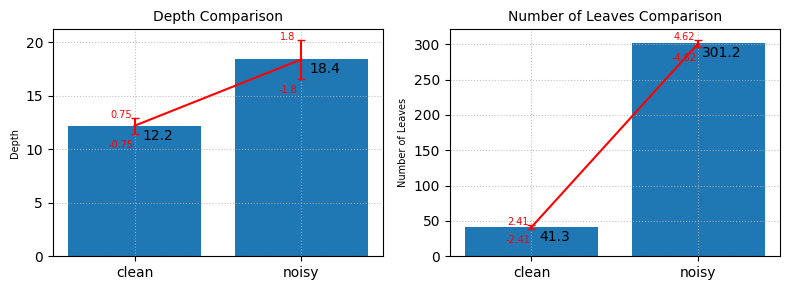

In [18]:
def plot_line_w_error(x, y, std, ax, metric_name):
    ax.bar(x, y)
    ax.errorbar(x, y, yerr=std, color="r", capsize=3)

    for X, Y, C in zip(x, y, std):
        C = round(C, 2)
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('{}'.format(Y), xy=(X,Y), xytext=(17, -10), ha='center',
                    textcoords='offset points', color="black", fontsize=10)
        ax.annotate('{}'.format(C), xy=(X,Y+C), xytext=(-10, 0), ha='center',
                    textcoords='offset points', color="red", fontsize=7)
        ax.annotate('{}'.format(-C), xy=(X,Y-C), xytext=(-10,-10), ha='center',
                    textcoords='offset points', color="red", fontsize=7)
    ax.set_ylabel(f"{metric_name}", fontsize=7)
    ax.set_title(f"{metric_name} Comparison", fontsize=10)
    ax.grid(True, alpha=0.8, linestyle=":")


x = ["clean", "noisy"]
y_depth = [clean_depth_leaf["avg_depth_before"], noisy_depth_leaf["avg_depth_before"]]
std_depth = [clean_depth_leaf["std_depth_before"], noisy_depth_leaf["std_depth_before"]]
y_leaf = [clean_depth_leaf["avg_leaf_before"], noisy_depth_leaf["avg_leaf_before"]]
std_leaf = [clean_depth_leaf["std_leaf_before"], noisy_depth_leaf["std_leaf_before"]]

fig, ax = plt.subplots(1,2, figsize=(8,3))
plot_line_w_error(x, y_depth, std_depth, ax[0], "Depth")
plot_line_w_error(x, y_leaf, std_leaf, ax[1], "Number of Leaves")

fig.tight_layout()

# 2. Dataset differences

In [8]:
data_path_clean = data_path + "/clean_dataset.txt"
data_path_noisy = data_path + "/noisy_dataset.txt"

X_clean, y_clean = load_wifi_dataset(data_path_clean)
X_noisy, y_noisy = load_wifi_dataset(data_path_noisy)

clean_classes, clean_classes_count = np.unique(y_clean, return_counts=True)
noisy_classes, noisy_classes_count = np.unique(y_noisy, return_counts=True)

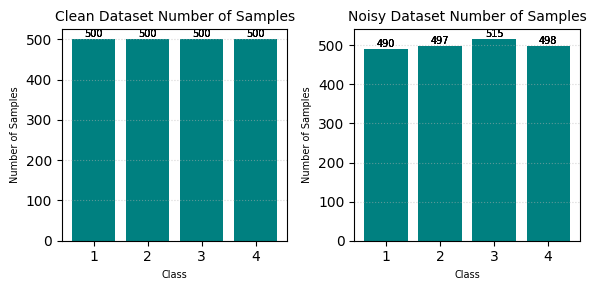

In [9]:
def plot_barchart(x, y, data_type, ax):
    for i in range(len(x)):
        p = ax.bar(x, y, color="teal")
        ax.bar_label(p, fontsize=7)
    ax.set_title(f"{data_type} Dataset Number of Samples", fontsize=10)
    ax.set_ylabel("Number of Samples", fontsize=7)
    ax.set_xlabel("Class", fontsize=7)
    ax.yaxis.grid(True, alpha=0.5, linestyle=":")

fig, ax = plt.subplots(1,2, figsize=(6,3))
plot_barchart(clean_classes, clean_classes_count, "Clean", ax[0])
plot_barchart(noisy_classes, noisy_classes_count, "Noisy", ax[1])
fig.tight_layout()

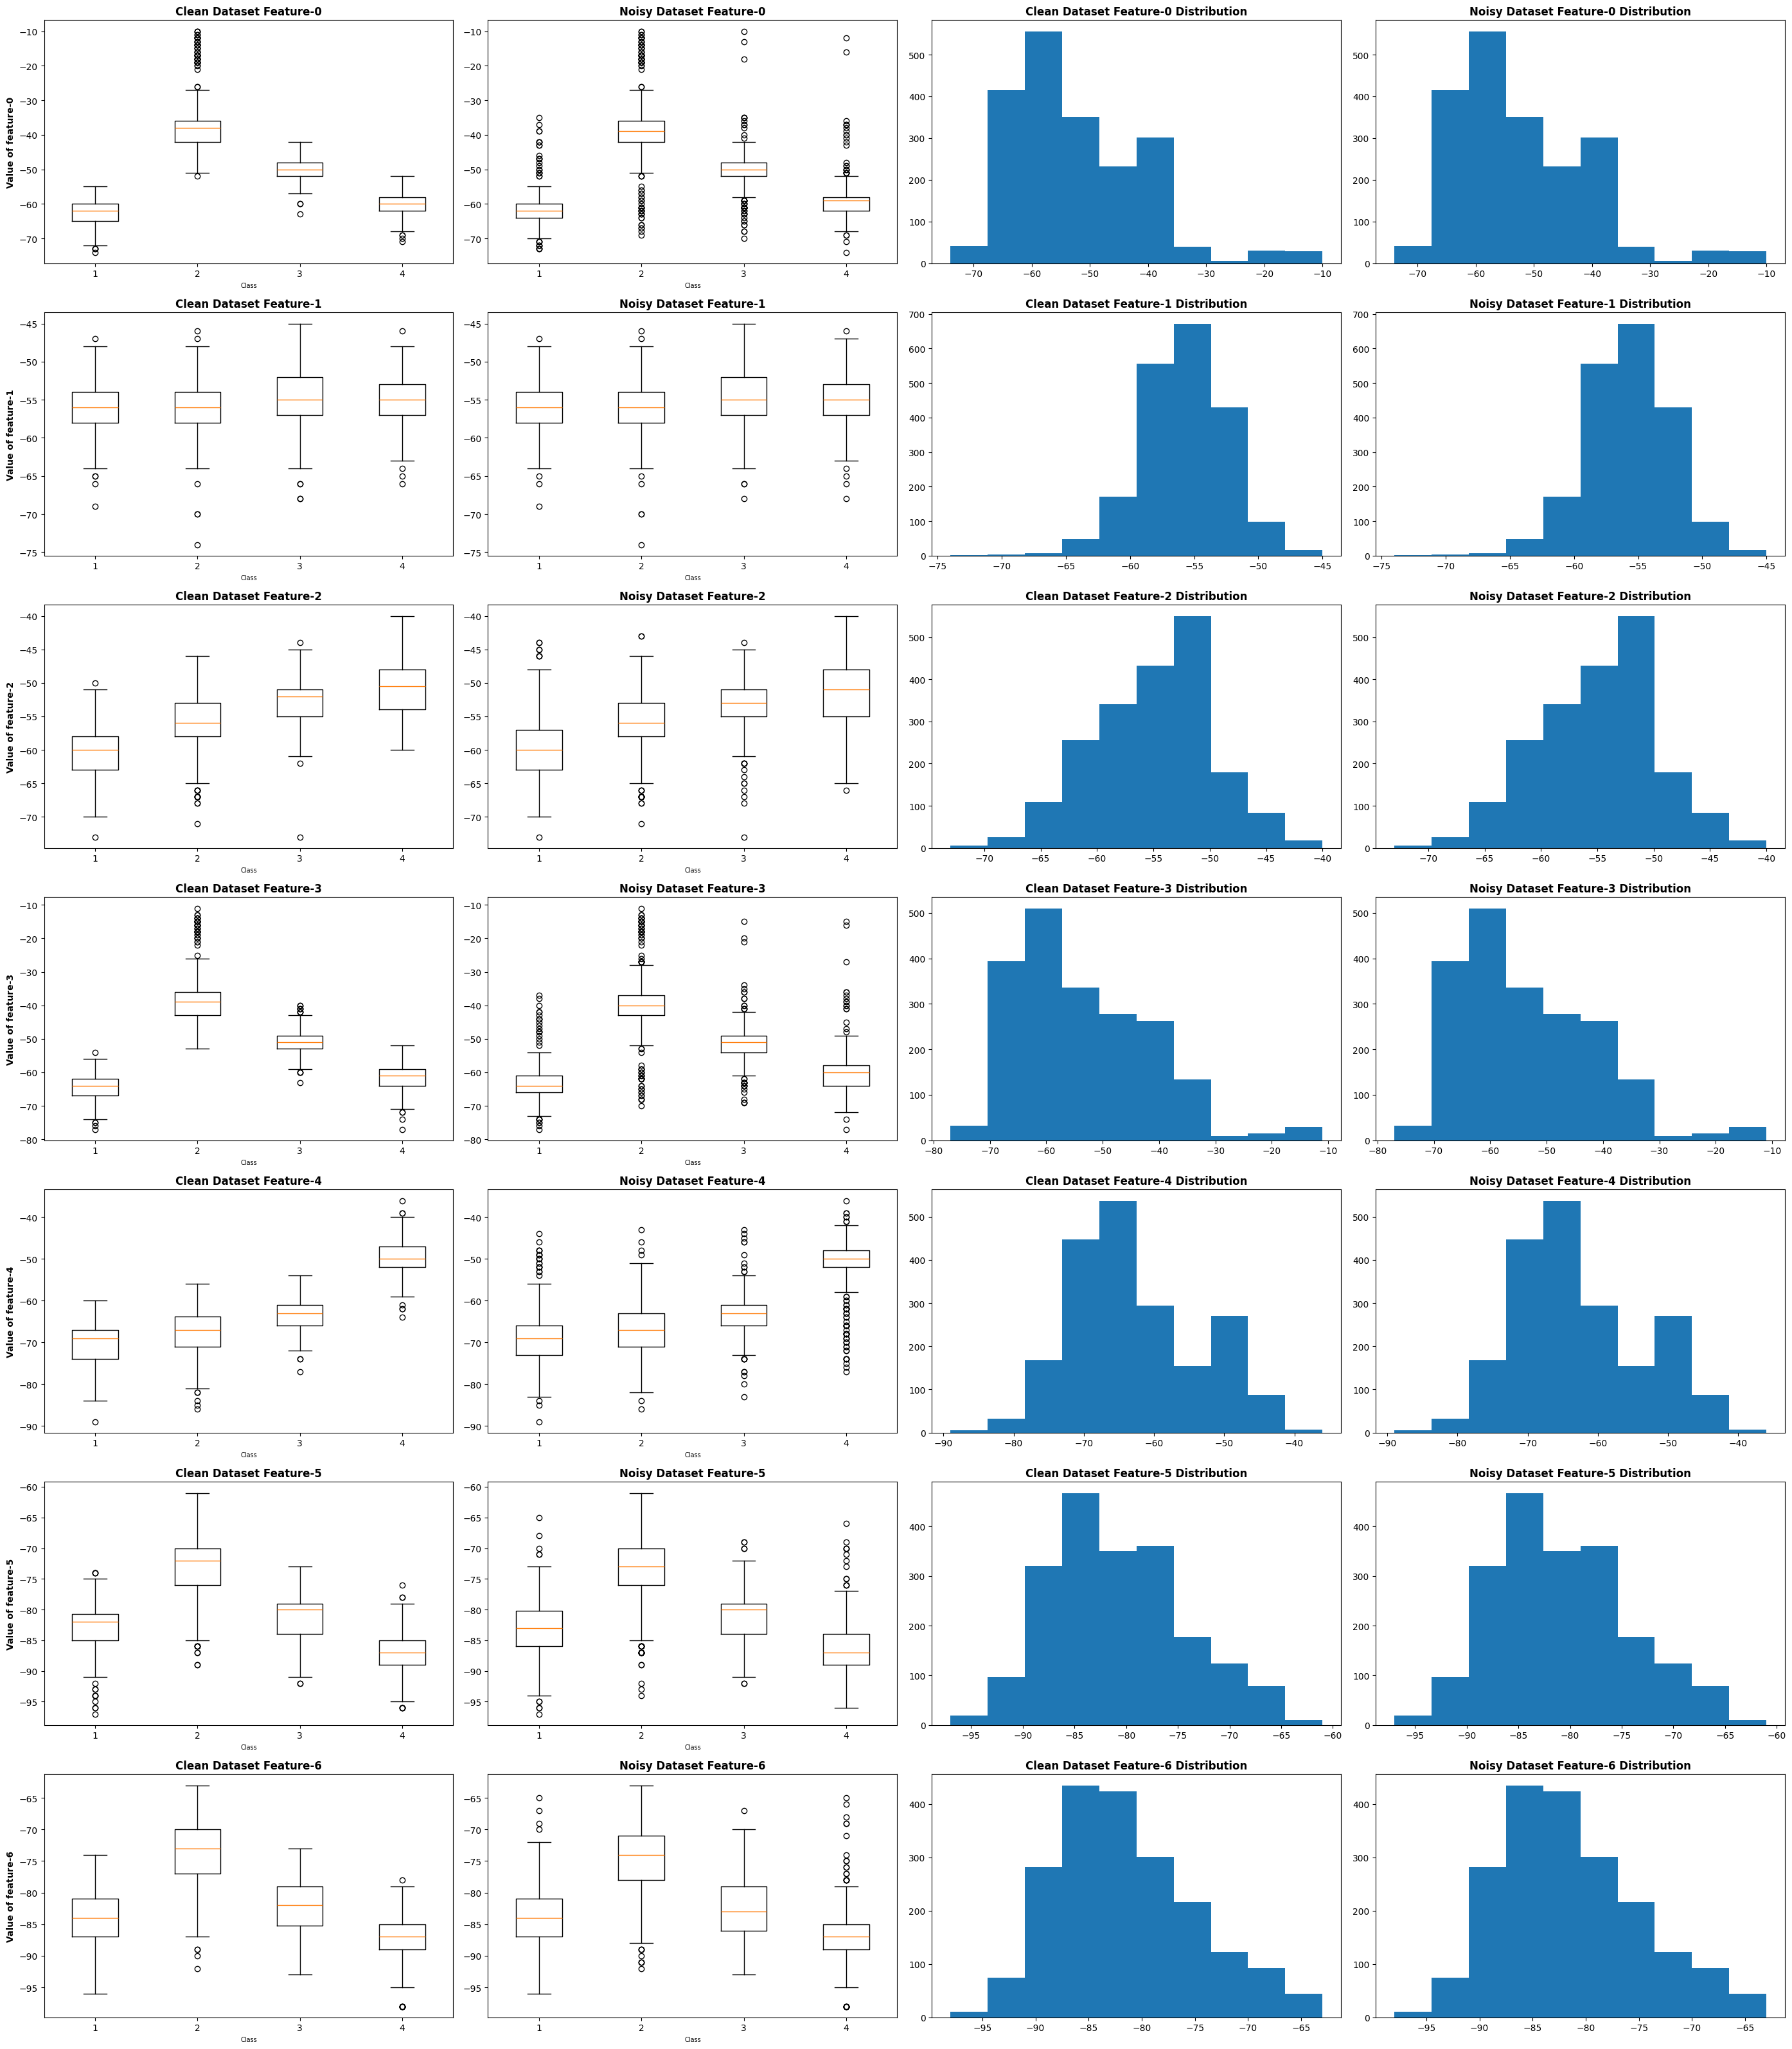

In [10]:
clean_label_feature_dic = {}
noisy_label_feature_dic = {}
for i in range(X_clean.shape[1]):
    clean_label_feature_dic[i] = {}
    noisy_label_feature_dic[i] = {}
    for j in range(len(np.unique(y_clean))):
        clean_label_feature_dic[i][j+1] = X_clean[y_clean==j+1][:,i]
        noisy_label_feature_dic[i][j+1] = X_noisy[y_noisy==j+1][:,i]

xplot = 2*2
yplot = X_clean.shape[1]
fig, ax = plt.subplots(yplot,xplot,figsize=(4*yplot,8*xplot))
xtemp = 0
ytemp = 0
for idx, y in enumerate(clean_label_feature_dic):
    spread_feature_y_clean = clean_label_feature_dic[y]
    spread_feature_y_noisy = noisy_label_feature_dic[y]
    
    ax[y][0].boxplot(spread_feature_y_clean.values())
    ax[y][0].set_xticklabels(spread_feature_y_clean.keys())
    ax[y][0].set_title(f"Clean Dataset Feature-{y}", fontsize=12, fontweight='bold')
    ax[y][0].set_xlabel("Class", fontsize=7)
    ax[y][0].set_ylabel(f"Value of feature-{y}", fontsize=10, fontweight='bold')
    
    ax[y][1].boxplot(spread_feature_y_noisy.values())
    ax[y][1].set_xticklabels(spread_feature_y_noisy.keys())
    ax[y][1].set_title(f"Noisy Dataset Feature-{y}", fontsize=12, fontweight='bold')
    ax[y][1].set_xlabel("Class", fontsize=7)

    ax[y][2].hist(X_clean[:,y])
    ax[y][2].set_title(f"Clean Dataset Feature-{y} Distribution", fontsize=12, fontweight='bold')

    ax[y][3].hist(X_noisy[:,y])
    ax[y][3].set_title(f"Noisy Dataset Feature-{y} Distribution", fontsize=12, fontweight='bold')

    fig.tight_layout()

In [11]:
clean_class_stats = {}
noisy_class_stats = {}

for c in np.unique(y_clean):
    c = int(c)
    clean_class_stats[c] = {}
    clean_class_stats[c]["median"] = []
    clean_class_stats[c]["std"] = []

    noisy_class_stats[c] = {}
    noisy_class_stats[c]["median"] = []
    noisy_class_stats[c]["std"] = []

for c in np.unique(y_clean):
    for f in range(X_clean.shape[1]):
        c_med = round(float(np.median(X_clean[y_clean==c][:,f])),3)
        c_std = round(float(np.std(X_clean[y_clean==c][:,f])),3)
        clean_class_stats[c]["median"].append(c_med)
        clean_class_stats[c]["std"].append(c_std)

        n_med = round(float(np.median(X_noisy[y_noisy==c][:,f])),3)
        n_std = round(float(np.std(X_noisy[y_noisy==c][:,f])),3)
        noisy_class_stats[c]["median"].append(n_med)
        noisy_class_stats[c]["std"].append(n_std)
    print(f"Class-{c}")
    print(f"- Avg Std of Each Feature")
    print(f"  - Clean: {np.average(clean_class_stats[c]["std"])}")
    print(f"  - Noisy: {np.average(noisy_class_stats[c]["std"])}")

Class-1
- Avg Std of Each Feature
  - Clean: 3.7351428571428578
  - Noisy: 4.630571428571429
Class-2
- Avg Std of Each Feature
  - Clean: 5.550571428571429
  - Noisy: 6.341
Class-3
- Avg Std of Each Feature
  - Clean: 3.505714285714286
  - Noisy: 4.402
Class-4
- Avg Std of Each Feature
  - Clean: 3.5381428571428564
  - Noisy: 4.877571428571429


In [12]:
clean_class_stats

{1: {'median': [-62.0, -56.0, -60.0, -64.0, -69.0, -82.0, -84.0],
  'std': [3.298, 3.249, 3.681, 3.642, 4.611, 3.725, 3.94]},
 2: {'median': [-38.0, -56.0, -56.0, -39.0, -67.0, -72.0, -73.0],
  'std': [8.715, 3.274, 4.174, 7.989, 5.25, 4.661, 4.791]},
 3: {'median': [-50.0, -55.0, -52.0, -51.0, -63.0, -80.0, -82.0],
  'std': [2.752, 3.683, 3.115, 3.611, 3.563, 3.598, 4.218]},
 4: {'median': [-60.0, -55.0, -50.5, -61.0, -50.0, -87.0, -87.0],
  'std': [3.009, 3.241, 4.148, 3.85, 3.588, 3.391, 3.54]}}

In [13]:
noisy_class_stats

{1: {'median': [-62.0, -56.0, -60.0, -64.0, -69.0, -83.0, -84.0],
  'std': [4.848, 3.25, 4.388, 5.256, 6.209, 4.126, 4.337]},
 2: {'median': [-39.0, -56.0, -56.0, -40.0, -67.0, -73.0, -74.0],
  'std': [10.26, 3.324, 4.336, 9.73, 5.735, 5.464, 5.538]},
 3: {'median': [-50.0, -55.0, -53.0, -51.0, -63.0, -80.0, -83.0],
  'std': [5.215, 3.659, 3.564, 5.427, 4.556, 3.914, 4.479]},
 4: {'median': [-59.0, -55.0, -51.0, -60.0, -50.0, -87.0, -87.0],
  'std': [5.384, 3.228, 4.542, 6.123, 6.263, 4.203, 4.4]}}

# 3. Result analysis after pruning

In [14]:
with open(clean_result_path+"/metrics_before.json", 'r') as file:
    clean_metrics_before = json.load(file)

with open(noisy_result_path+"/metrics_before.json", 'r') as file:
    noisy_metrics_before = json.load(file)

with open(clean_result_path+"/metrics_after.json", 'r') as file:
    clean_metrics_after = json.load(file)

with open(noisy_result_path+"/metrics_after.json", 'r') as file:
    noisy_metrics_after = json.load(file)

with open(clean_result_path+"/depth_before_after.json", 'r') as file:
    clean_depth_leaf = json.load(file)

with open(noisy_result_path+"/depth_before_after.json", 'r') as file:
    noisy_depth_leaf = json.load(file)

before vs after pruning:
Compare accuracy, depth, and number of leaf
→ more number of leaf: more overfit
Clean dataset has slightly worse accuracy (0.4% diff), but it might be more computationally efficient because it has less nodes to traverse


---------------------------------------------------------------------------
Clean Dataset
---------------------------------------------------------------------------
Accuracy
- Before pruning	: 0.974
- After pruning		: 0.970
- After - Before	: -0.004
- Changes after pruning	: -0.411%
---------------------------------------------------------------------------
Average of Tree Depth
- Before pruning	: 12.200
- After pruning		: 8.800
- After - Before	: -3.400
- Changes after pruning	: -27.869%
---------------------------------------------------------------------------
Average of Number of Leaves
- Before pruning	: 41.300
- After pruning		: 17.100
- After - Before	: -24.200
- Changes after pruning	: -58.596%
---------------------------------------------------------------------------


---------------------------------------------------------------------------
Noisy Dataset
---------------------------------------------------------------------------
Accuracy
- Before pruning	: 0.804
- After p

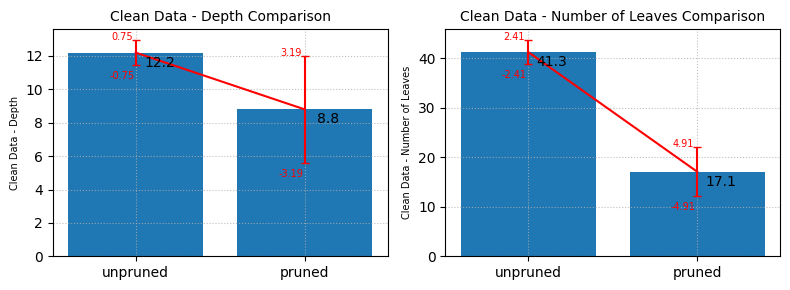

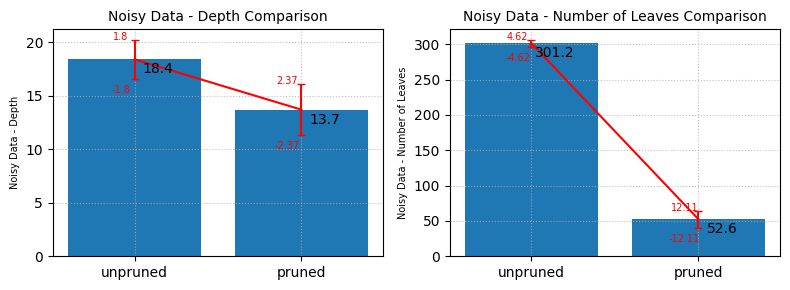

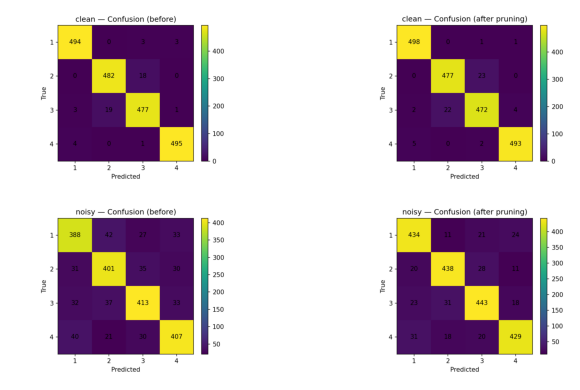

In [ ]:
def metrics_compare(value_name, value_before, value_after):
    print(value_name)
    print(f"- Before pruning\t: {value_before:.3f}")
    print(f"- After pruning\t\t: {value_after:.3f}")
    print(f"- After - Before\t: {value_after - value_before:.3f}")
    print(f"- Changes after pruning\t: {(value_after - value_before)*100/value_before:.3f}%")
    print_dashes()

x = ["unpruned", "pruned"]
#clean unpruned vs pruned
y_depth = [clean_depth_leaf["avg_depth_before"], clean_depth_leaf["avg_depth_after"]]
std_depth = [clean_depth_leaf["std_depth_before"], clean_depth_leaf["std_depth_after"]]

y_leaf = [clean_depth_leaf["avg_leaf_before"], clean_depth_leaf["avg_leaf_after"]]
std_leaf = [clean_depth_leaf["std_leaf_before"], clean_depth_leaf["std_leaf_after"]]

fig, ax = plt.subplots(1,2, figsize=(8,3))

plot_line_w_error(x, y_depth, std_depth, ax[0], "Clean Data - Depth")
plot_line_w_error(x, y_leaf, std_leaf, ax[1], "Clean Data - Number of Leaves")

fig.tight_layout()

x = ["unpruned", "pruned"]
#noisy unpruned vs pruned
y_depth = [noisy_depth_leaf["avg_depth_before"], noisy_depth_leaf["avg_depth_after"]]
std_depth = [noisy_depth_leaf["std_depth_before"], noisy_depth_leaf["std_depth_after"]]

y_leaf = [noisy_depth_leaf["avg_leaf_before"], noisy_depth_leaf["avg_leaf_after"]]
std_leaf = [noisy_depth_leaf["std_leaf_before"], noisy_depth_leaf["std_leaf_after"]]

fig, ax = plt.subplots(1,2, figsize=(8,3))

plot_line_w_error(x, y_depth, std_depth, ax[0], "Noisy Data - Depth")
plot_line_w_error(x, y_leaf, std_leaf, ax[1], "Noisy Data - Number of Leaves")

fig.tight_layout()

clean_cm_img_before = np.asarray(Image.open(clean_result_path+"/cm_before.png"))
noisy_cm_img_before = np.asarray(Image.open(noisy_result_path+"/cm_before.png"))
clean_cm_img_after = np.asarray(Image.open(clean_result_path+"/cm_after.png"))
noisy_cm_img_after = np.asarray(Image.open(noisy_result_path+"/cm_after.png"))


fig, ax = plt.subplots(2,2, figsize=(8,4))
ax[0][0].imshow(clean_cm_img_before)
ax[0][0].axis(False)

ax[0][1].imshow(clean_cm_img_after)
ax[0][1].axis(False)

ax[1][0].imshow(noisy_cm_img_before)
ax[1][0].axis(False)

ax[1][1].imshow(noisy_cm_img_after)
ax[1][1].axis(False)

fig.tight_layout()

print_dashes()
print("Clean Dataset")
print_dashes()
metrics_compare("Accuracy", clean_metrics_before["accuracy"], clean_metrics_after["accuracy"])
metrics_compare("Average of Tree Depth", clean_depth_leaf["avg_depth_before"], clean_depth_leaf["avg_depth_after"])
metrics_compare("Average of Number of Leaves", clean_depth_leaf["avg_leaf_before"], clean_depth_leaf["avg_leaf_after"])
print()
print()

print_dashes()
print("Noisy Dataset")
print_dashes()
metrics_compare("Accuracy", noisy_metrics_before["accuracy"], noisy_metrics_after["accuracy"])
metrics_compare("Average of Tree Depth", noisy_depth_leaf["avg_depth_before"], noisy_depth_leaf["avg_depth_after"])
metrics_compare("Average of Number of Leaves", noisy_depth_leaf["avg_leaf_before"], noisy_depth_leaf["avg_leaf_after"])

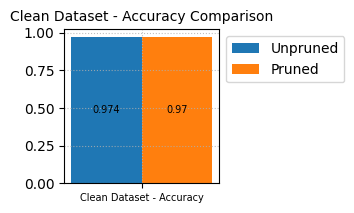

Clean Dataset - Accuracy Comparison
---------------------------------------------------------------------------
Clean		: 0.974
Noisy		: 0.970
Clean - Noisy	: 0.004
Clean dataset Clean Dataset - Accuracy is 0.412% higher than the noisy dataset
---------------------------------------------------------------------------


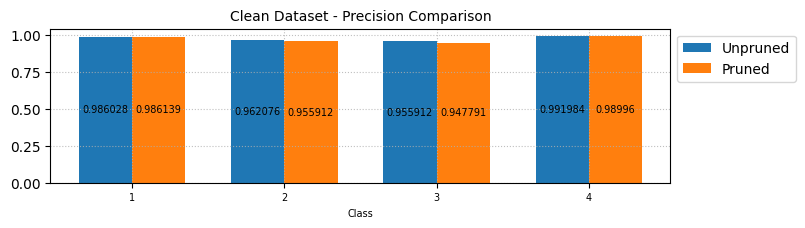

Clean Dataset - Precision Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.986
Noisy		: 0.986
Clean - Noisy	: -0.000
Clean dataset Clean Dataset - Precision is -0.011% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.962
Noisy		: 0.956
Clean - Noisy	: 0.006
Clean dataset Clean Dataset - Precision is 0.645% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.956
Noisy		: 0.948
Clean - Noisy	: 0.008
Clean dataset Clean Dataset - Precision is 0.857% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.992
Noisy		: 0.990
Clean - Noisy	: 0.002
Clean dataset Clean Dataset - Precision is 0.204% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 

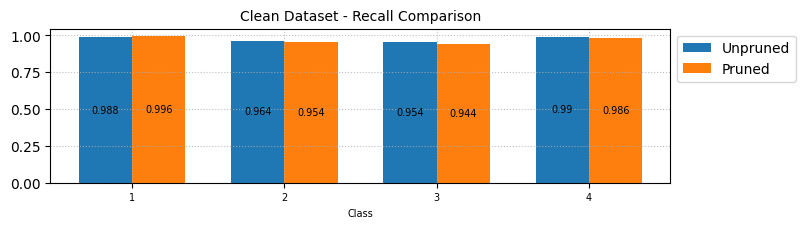

Clean Dataset - Recall Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.988
Noisy		: 0.996
Clean - Noisy	: -0.008
Clean dataset Clean Dataset - Recall is -0.803% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.964
Noisy		: 0.954
Clean - Noisy	: 0.010
Clean dataset Clean Dataset - Recall is 1.048% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.954
Noisy		: 0.944
Clean - Noisy	: 0.010
Clean dataset Clean Dataset - Recall is 1.059% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.990
Noisy		: 0.986
Clean - Noisy	: 0.004
Clean dataset Clean Dataset - Recall is 0.406% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.974
Noisy		: 

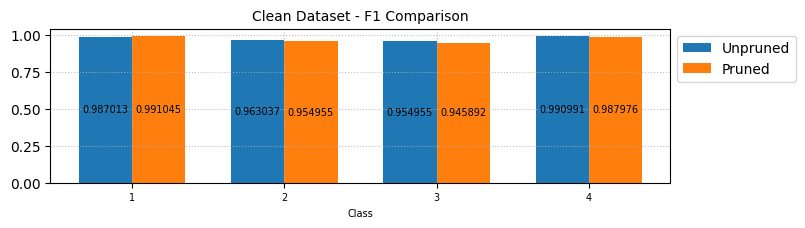

Clean Dataset - F1 Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.987
Noisy		: 0.991
Clean - Noisy	: -0.004
Clean dataset Clean Dataset - F1 is -0.407% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.963
Noisy		: 0.955
Clean - Noisy	: 0.008
Clean dataset Clean Dataset - F1 is 0.846% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.955
Noisy		: 0.946
Clean - Noisy	: 0.009
Clean dataset Clean Dataset - F1 is 0.958% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.991
Noisy		: 0.988
Clean - Noisy	: 0.003
Clean dataset Clean Dataset - F1 is 0.305% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.974
Noisy		: 0.970
Clean-Noisy	: 

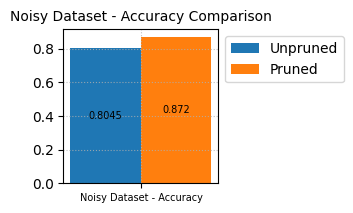

Noisy Dataset - Accuracy Comparison
---------------------------------------------------------------------------
Clean		: 0.804
Noisy		: 0.872
Clean - Noisy	: -0.068
Clean dataset Noisy Dataset - Accuracy is -7.741% higher than the noisy dataset
---------------------------------------------------------------------------


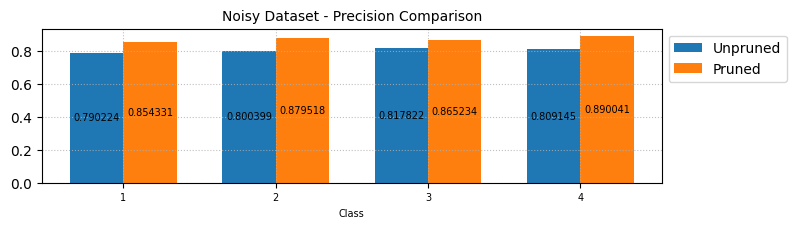

Noisy Dataset - Precision Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.790
Noisy		: 0.854
Clean - Noisy	: -0.064
Clean dataset Noisy Dataset - Precision is -7.504% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.800
Noisy		: 0.880
Clean - Noisy	: -0.079
Clean dataset Noisy Dataset - Precision is -8.996% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.818
Noisy		: 0.865
Clean - Noisy	: -0.047
Clean dataset Noisy Dataset - Precision is -5.480% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.809
Noisy		: 0.890
Clean - Noisy	: -0.081
Clean dataset Noisy Dataset - Precision is -9.089% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Cle

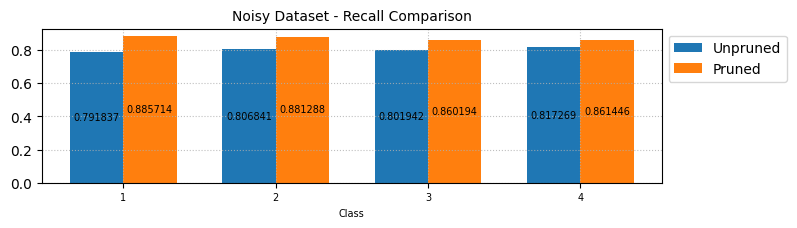

Noisy Dataset - Recall Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.792
Noisy		: 0.886
Clean - Noisy	: -0.094
Clean dataset Noisy Dataset - Recall is -10.599% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.807
Noisy		: 0.881
Clean - Noisy	: -0.074
Clean dataset Noisy Dataset - Recall is -8.447% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.802
Noisy		: 0.860
Clean - Noisy	: -0.058
Clean dataset Noisy Dataset - Recall is -6.772% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.817
Noisy		: 0.861
Clean - Noisy	: -0.044
Clean dataset Noisy Dataset - Recall is -5.128% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.804
No

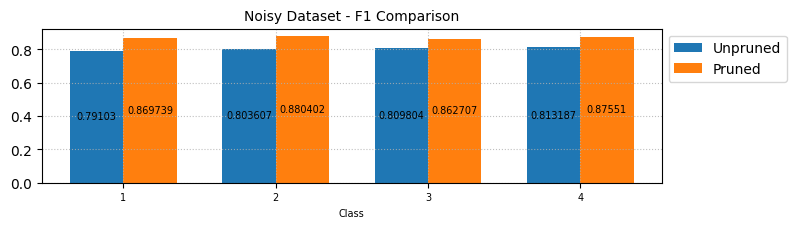

Noisy Dataset - F1 Comparison
---------------------------------------------------------------------------
Class-1:
Clean		: 0.791
Noisy		: 0.870
Clean - Noisy	: -0.079
Clean dataset Noisy Dataset - F1 is -9.050% higher than the noisy dataset
---------------------------------------------------------------------------
Class-2:
Clean		: 0.804
Noisy		: 0.880
Clean - Noisy	: -0.077
Clean dataset Noisy Dataset - F1 is -8.723% higher than the noisy dataset
---------------------------------------------------------------------------
Class-3:
Clean		: 0.810
Noisy		: 0.863
Clean - Noisy	: -0.053
Clean dataset Noisy Dataset - F1 is -6.132% higher than the noisy dataset
---------------------------------------------------------------------------
Class-4:
Clean		: 0.813
Noisy		: 0.876
Clean - Noisy	: -0.062
Clean dataset Noisy Dataset - F1 is -7.119% higher than the noisy dataset
---------------------------------------------------------------------------
Average
Clean		: 0.804
Noisy		: 0.872
Clean-No

In [27]:
clean_metrics_before
clean_metrics_after
noisy_metrics_before
noisy_metrics_after
clean_depth_leaf
noisy_depth_leaf

metrics_diff("Clean Dataset - Accuracy", clean_metrics_before["accuracy"], clean_metrics_after["accuracy"])
metrics_diff("Clean Dataset - Precision", clean_metrics_before["per_class"]["precision"], clean_metrics_after["per_class"]["precision"], clean_metrics_before["labels"])
metrics_diff("Clean Dataset - Recall", clean_metrics_before["per_class"]["recall"], clean_metrics_after["per_class"]["recall"], clean_metrics_before["labels"])
metrics_diff("Clean Dataset - F1", clean_metrics_before["per_class"]["f1"], clean_metrics_after["per_class"]["f1"], clean_metrics_before["labels"])


metrics_diff("Noisy Dataset - Accuracy", noisy_metrics_before["accuracy"], noisy_metrics_after["accuracy"])
metrics_diff("Noisy Dataset - Precision", noisy_metrics_before["per_class"]["precision"], noisy_metrics_after["per_class"]["precision"], noisy_metrics_before["labels"])
metrics_diff("Noisy Dataset - Recall", noisy_metrics_before["per_class"]["recall"], noisy_metrics_after["per_class"]["recall"], noisy_metrics_before["labels"])
metrics_diff("Noisy Dataset - F1", noisy_metrics_before["per_class"]["f1"], noisy_metrics_after["per_class"]["f1"], noisy_metrics_before["labels"])

# 4. Depth Analysis

In [16]:
def check_switched_prediciton(name, confusion_matrix):
    print_dashes()
    print(name)
    all_wrong = np.sum(confusion_matrix)-np.trace(confusion_matrix)
    print(f"Wrong predictions: {all_wrong}")
    print(f"Total switched predictions between classes")
    for i in range(len(confusion_matrix)):
        for j in range(i+1, len(confusion_matrix)):
            switched_ij = confusion_matrix[i][j]+confusion_matrix[j][i]
            print(f"{i+1} <-> {j+1}: {switched_ij} ({switched_ij*100/all_wrong:.3f}%)")
    print_dashes()
    print()       

check_switched_prediciton("Clean dataset before pruning", clean_metrics_before["confusion_matrix"])
check_switched_prediciton("Clean dataset after pruning", clean_metrics_after["confusion_matrix"])
check_switched_prediciton("Noisy dataset before pruning", noisy_metrics_before["confusion_matrix"])
check_switched_prediciton("Noisy dataset after pruning", noisy_metrics_after["confusion_matrix"])

---------------------------------------------------------------------------
Clean dataset before pruning
Wrong predictions: 52
Total switched predictions between classes
1 <-> 2: 0 (0.000%)
1 <-> 3: 6 (11.538%)
1 <-> 4: 7 (13.462%)
2 <-> 3: 37 (71.154%)
2 <-> 4: 0 (0.000%)
3 <-> 4: 2 (3.846%)
---------------------------------------------------------------------------

---------------------------------------------------------------------------
Clean dataset after pruning
Wrong predictions: 60
Total switched predictions between classes
1 <-> 2: 0 (0.000%)
1 <-> 3: 3 (5.000%)
1 <-> 4: 6 (10.000%)
2 <-> 3: 45 (75.000%)
2 <-> 4: 0 (0.000%)
3 <-> 4: 6 (10.000%)
---------------------------------------------------------------------------

---------------------------------------------------------------------------
Noisy dataset before pruning
Wrong predictions: 391
Total switched predictions between classes
1 <-> 2: 73 (18.670%)
1 <-> 3: 59 (15.090%)
1 <-> 4: 73 (18.670%)
2 <-> 3: 72 (18.414%)
